# 📊 Comprensión y Análisis Exploratorio de Datos (EDA)

## 1. Contexto

Este notebook tiene como objetivo realizar un análisis exploratorio y descriptivo del conjunto de datos, con el fin de comprender su estructura, calidad, distribución de variables y relaciones relevantes con la variable objetivo **pago_atiempo**.  

El análisis permitirá:

- Evaluar calidad de datos.
- Detectar valores nulos y atípicos.
- Identificar patrones.
- Proponer transformaciones futuras.
- Establecer reglas de validación.

---

## 2. Importación de librerías


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Carga de datos

In [2]:
DATA_PATH = "../../Base_de_datos.xlsx"
df = pd.read_excel(DATA_PATH)

## 4. Exploración inicial

In [3]:
print("Dimensiones:", df.shape)
df.head()

Dimensiones: (10763, 23)


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [5]:
df.isnull().sum()

tipo_credito                        0
fecha_prestamo                      0
capital_prestado                    0
plazo_meses                         0
edad_cliente                        0
tipo_laboral                        0
salario_cliente                     0
total_otros_prestamos               0
cuota_pactada                       0
puntaje                             0
puntaje_datacredito                 6
cant_creditosvigentes               0
huella_consulta                     0
saldo_mora                        156
saldo_total                       156
saldo_principal                   405
saldo_mora_codeudor               590
creditos_sectorFinanciero           0
creditos_sectorCooperativo          0
creditos_sectorReal                 0
promedio_ingresos_datacredito    2930
tendencia_ingresos               2932
Pago_atiempo                        0
dtype: int64

### 4.1 Tratamiento de nulos

In [6]:
df = df[df["puntaje_datacredito"].notna()] # conservamos filas sin NaN en puntaje_datacredito

In [7]:
# Rellenamos NaN en saldos con 0
saldo_cols = [
    "saldo_mora",
    "saldo_total",
    "saldo_principal",
    "saldo_mora_codeudor"
]

df[saldo_cols] = df[saldo_cols].fillna(0)

In [8]:
# Rellenamos NaN en promedio_ingresos_datacredito con la mediana
mediana_ingresos = df["promedio_ingresos_datacredito"].median()
df["promedio_ingresos_datacredito"] = df["promedio_ingresos_datacredito"].fillna(mediana_ingresos)

In [9]:
# Rellenamos NaN en tendencia_ingresos con "Desconocido"
df["tendencia_ingresos"] = df["tendencia_ingresos"].fillna("Desconocido")

In [10]:
df.isnull().sum()

tipo_credito                     0
fecha_prestamo                   0
capital_prestado                 0
plazo_meses                      0
edad_cliente                     0
tipo_laboral                     0
salario_cliente                  0
total_otros_prestamos            0
cuota_pactada                    0
puntaje                          0
puntaje_datacredito              0
cant_creditosvigentes            0
huella_consulta                  0
saldo_mora                       0
saldo_total                      0
saldo_principal                  0
saldo_mora_codeudor              0
creditos_sectorFinanciero        0
creditos_sectorCooperativo       0
creditos_sectorReal              0
promedio_ingresos_datacredito    0
tendencia_ingresos               0
Pago_atiempo                     0
dtype: int64

### Justificación

- Puntaje de crédito es crítico → registros sin este valor se descartan.
- Montos nulos se interpretan como ausencia de deuda.
- Ingresos se imputan con mediana por robustez ante outliers.
- Categorías nulas se renombran explícitamente.

Regla futura:
> No deben existir nulos en variables críticas.

## 5. Caracterización de variables

In [11]:
numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
fechas = df.select_dtypes(include=["datetime"]).columns.tolist()

In [12]:
print("Numéricas:", numericas)
print("Categóricas:", categoricas)
print("Fechas:", fechas)

Numéricas: ['tipo_credito', 'capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente', 'total_otros_prestamos', 'cuota_pactada', 'puntaje', 'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta', 'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor', 'creditos_sectorFinanciero', 'creditos_sectorCooperativo', 'creditos_sectorReal', 'promedio_ingresos_datacredito', 'Pago_atiempo']
Categóricas: ['tipo_laboral', 'tendencia_ingresos']
Fechas: ['fecha_prestamo']


Las variables numéricas corresponden principalmente a montos, conteos y puntajes.
Las variables categóricas describen características del cliente.
Se identifica una variable temporal asociada a la fecha del préstamo.
La variable objetivo es Pago_atiempo.

### 5.1 Normalización de variables

In [13]:
# Normalizamos nombres de columnas
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

## 6. Conversión de tipos (types)

In [14]:
df["fecha_prestamo"] = pd.to_datetime(df["fecha_prestamo"]) # Convertir a tipo fecha

In [15]:
cat_cols = [
    "tipo_credito",
    "tipo_laboral",
    "tendencia_ingresos"
]

df[cat_cols] = df[cat_cols].astype("category") # Convertir a tipo categoría

In [16]:
df["pago_atiempo"] = df["pago_atiempo"].astype(int) # Convertir booleano a entero

### Tipología de variables

- Numéricas continuas: montos, ingresos.
- Numéricas discretas: conteos.
- Categóricas nominales: tipo_credito, tipo_laboral.
- Dicotómica: pago_atiempo (0/1).
- Temporal: fecha_prestamo.

## 7. Eliminación de variables irrelevantes

In [17]:
cols_to_drop = ["id_cliente"]
df = df.drop(columns=cols_to_drop, errors="ignore")

## 🔍 8. Análisis Univariado

### 8.1 Variables Numéricas - Estadísticos

In [18]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
fecha_prestamo,10757,2025-04-16 23:27:25.843264768,2024-11-26 09:17:04,2025-01-20 17:30:54,2025-03-27 16:27:27,2025-06-16 13:58:03,2026-04-26 18:43:52,NaN
capital_prestado,10757.0,2433722.828038,360000.0,1224741.6,1921482.0,3084000.0,41444152.8,1909595.005232
plazo_meses,10757.0,10.576369,2.0,6.0,10.0,12.0,90.0,6.633604
edad_cliente,10757.0,43.930092,19.0,33.0,42.0,53.0,123.0,15.007019
salario_cliente,10757.0,17182136.2708,0.0,2000000.0,3000000.0,4848000.0,22000000000.0,355556647.597323
total_otros_prestamos,10757.0,6207702.668681,0.0,500000.0,1000000.0,2000000.0,6787675263.0,118404263.377158
cuota_pactada,10757.0,243562.05931,23944.0,121035.0,182846.0,287714.0,3816752.0,210505.559876
puntaje,10757.0,91.178436,-38.00999,95.227787,95.227787,95.227787,95.227787,16.437242
puntaje_datacredito,10757.0,780.790834,-7.0,757.0,791.0,825.0,999.0,104.878031
cant_creditosvigentes,10757.0,5.729943,0.0,3.0,5.0,8.0,62.0,3.97597


Se analizan:

- Media, mediana → tendencia central  
- Std → dispersión  
- Min / Max → rango  

### 8.2 Histogramas

In [19]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente',
       'total_otros_prestamos', 'cuota_pactada', 'puntaje',
       'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta',
       'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor',
       'creditos_sectorfinanciero', 'creditos_sectorcooperativo',
       'creditos_sectorreal', 'promedio_ingresos_datacredito'],
      dtype='object')

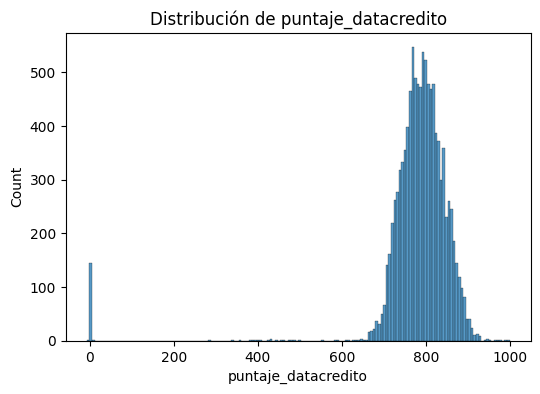

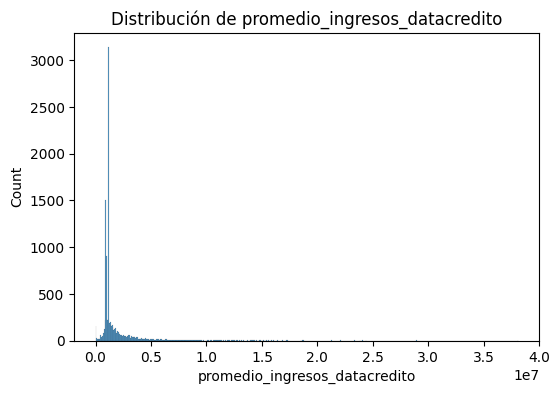

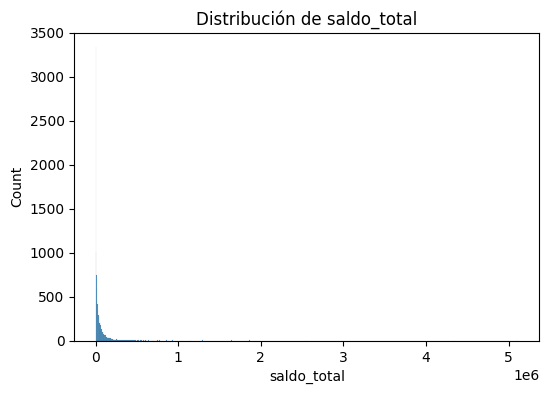

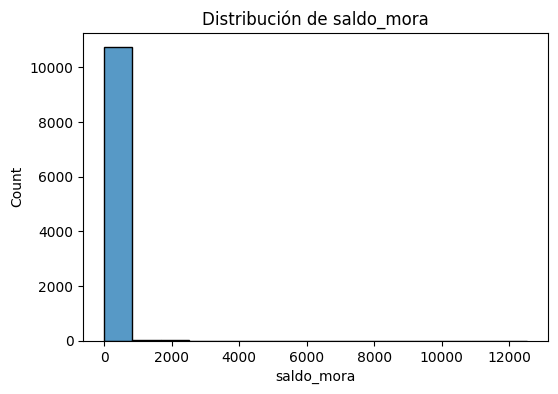

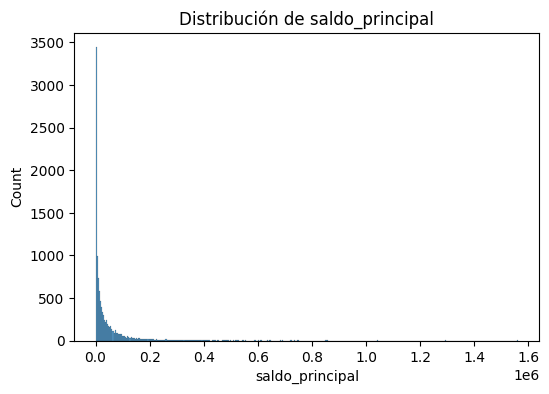

In [20]:
num_cols_focus = [
    "puntaje_datacredito",
    "promedio_ingresos_datacredito",
    "saldo_total",
    "saldo_mora",
    "saldo_principal"
]

for col in num_cols_focus:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=False)
    plt.title(f"Distribución de {col}")
    plt.show()

### 8.3 Boxplots

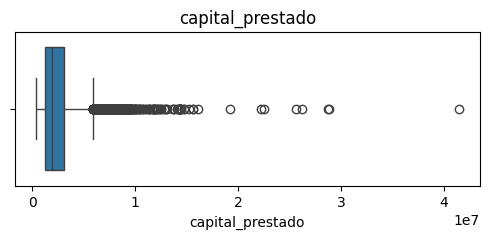

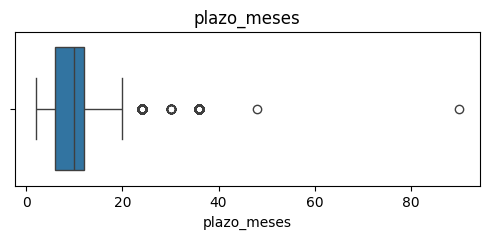

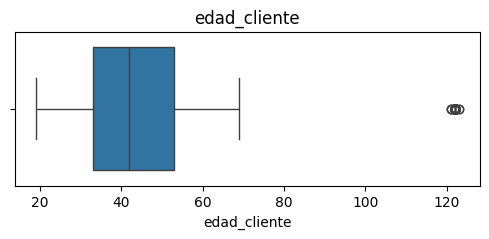

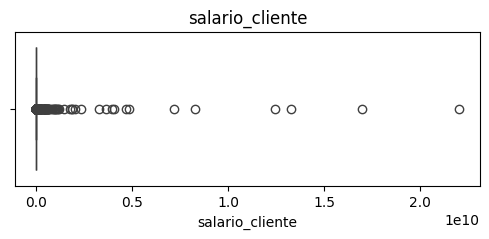

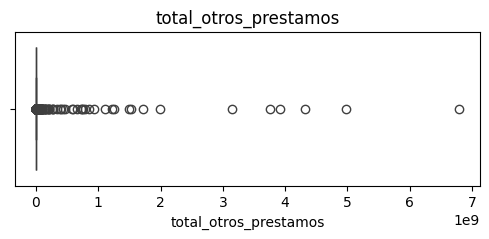

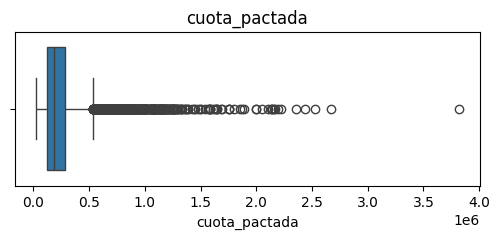

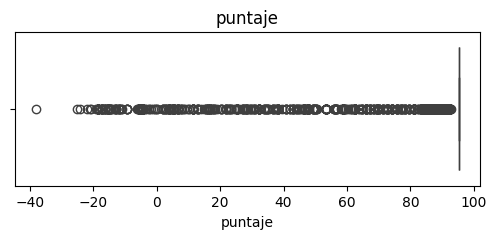

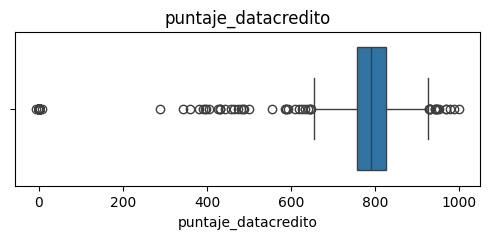

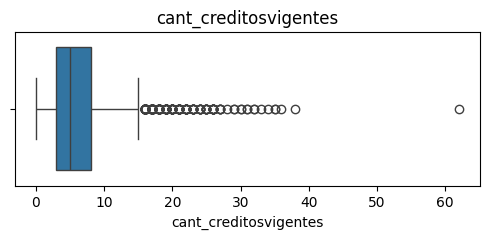

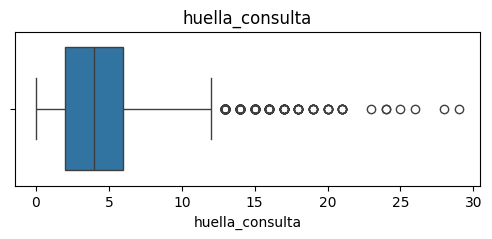

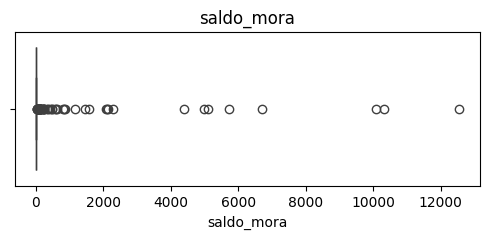

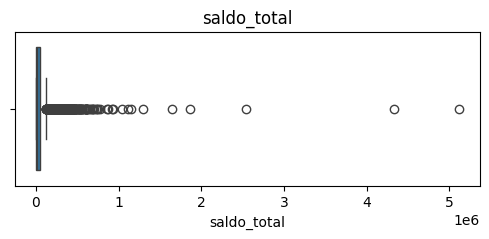

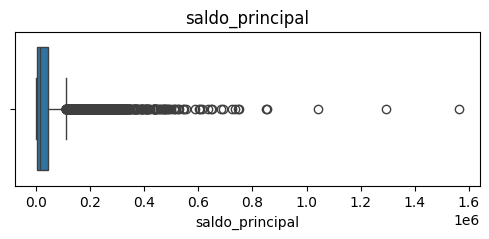

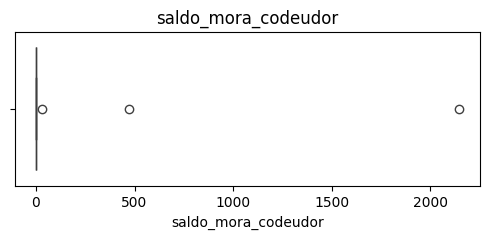

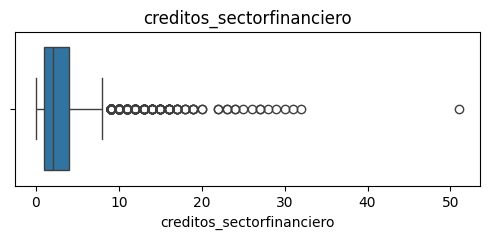

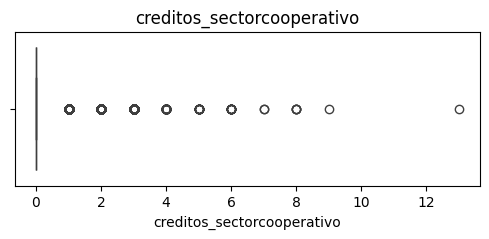

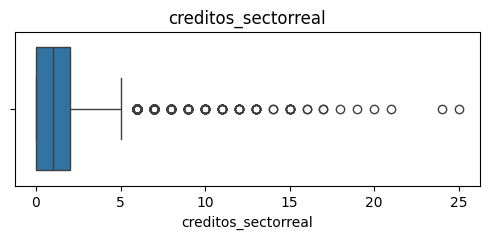

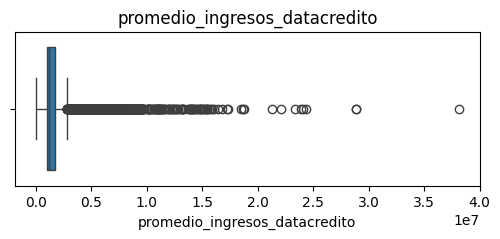

In [21]:
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

Detectar outliers potenciales.

### 8.4 Variables Categóricas

In [22]:
cat_cols = df.select_dtypes(include="category").columns

for col in cat_cols:
    display(df[col].value_counts())

tipo_credito
4     7745
9     2872
10     116
6       21
7        2
68       1
Name: count, dtype: int64

tipo_laboral
Empleado         6750
Independiente    4007
Name: count, dtype: int64

tendencia_ingresos
Creciente      5293
Desconocido    2927
Decreciente    1291
Estable        1188
0                 7
8315              6
1000000           4
9147              2
168750            1
75761             1
77975             1
82657             1
86286             1
122727            1
146918            1
158042            1
209090            1
173031            1
54683             1
417087            1
1123000           1
1817052           1
2029000           1
4250635           1
65988             1
-702927           1
52862             1
3978              1
-435177           1
-224714           1
-164315           1
-101368           1
-70715            1
-28589            1
-4105             1
-288              1
5697              1
-566272           1
9090              1
10808             1
15090             1
15245             1
17181             1
22363             1
22832             1
24702             1
31837             1
Name: count, dtype: int64

#### 8.4.1 Estrategia de tratamiento

In [23]:
import numpy as np

def normalizar_ingreso(x):
    # Primero convertimos a string para manejar valores categóricos
    try:
        val = float(x)
        if val > 0:
            return "Creciente"
        elif val < 0:
            return "Decreciente"
        else:
            return "Estable"
    except:
        # Si no se puede convertir a número, devolvemos el valor original
        if x in ["Creciente", "Decreciente", "Estable", "Desconocido"]:
            return x
        else:
            return "Desconocido"

df['tendencia_ingresos_norm'] = df['tendencia_ingresos'].apply(normalizar_ingreso)


In [24]:
df['tendencia_ingresos_norm'].value_counts()

tendencia_ingresos_norm
Creciente      5334
Desconocido    2927
Decreciente    1301
Estable        1195
Name: count, dtype: int64

In [ ]:
df[df['tendencia_ingresos_norm'] == "Desconocido"]['tendencia_ingresos'].unique()

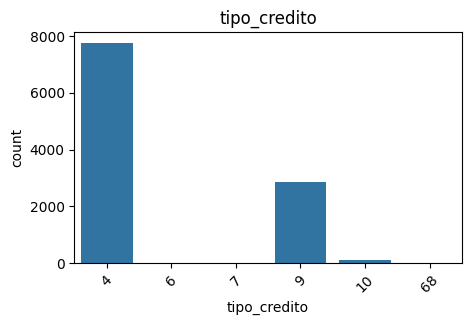

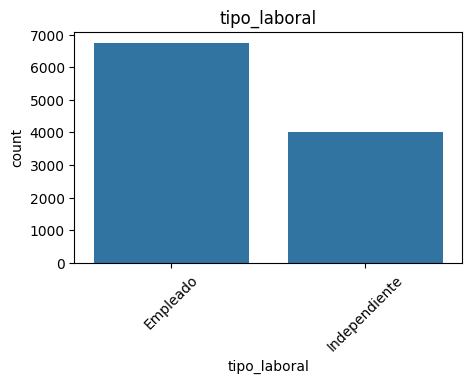

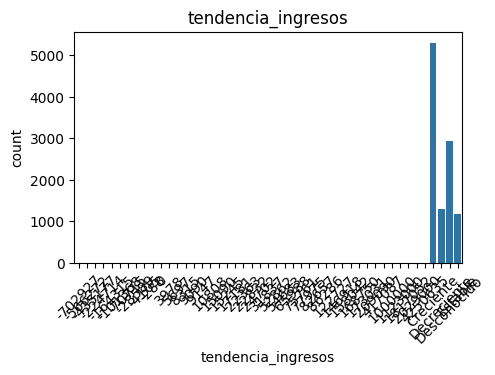

In [25]:
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

### Interpretación: tendencia_ingresos

El gráfico de conteo muestra una alta cantidad de categorías distintas para la variable `tendencia_ingresos`, lo cual no es esperable para una variable que conceptualmente debería contener un número reducido de niveles (por ejemplo: Creciente, Estable, Decreciente, Desconocido).

Esto sugiere posibles problemas de calidad de datos, tales como:
- Diferencias de mayúsculas/minúsculas.
- Presencia de espacios en blanco.
- Variantes textuales de una misma categoría.

A pesar de esto, se observa que existen pocas categorías con alta frecuencia y muchas categorías con frecuencia baja, lo que indica que la mayor parte de los registros se concentra en un conjunto reducido de valores.

Conclusión:
Será necesario realizar una etapa de estandarización de textos (normalización a minúsculas, eliminación de espacios y posible agrupación de categorías equivalentes) antes del modelado, con el objetivo de reducir cardinalidad y mejorar la calidad de esta variable.

In [26]:
df["tendencia_ingresos"] = (
    df["tendencia_ingresos"]
    .str.lower()
    .str.strip()
)

## 🔁 9. Análisis Bivariado (con variable objetivo)

### 9.1 Numéricas vs pago_atiempo

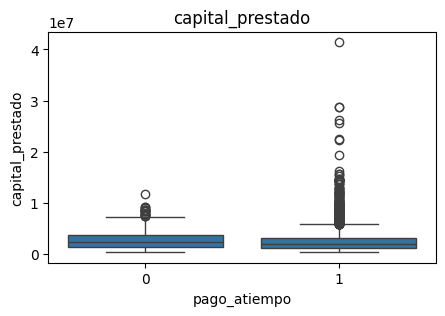

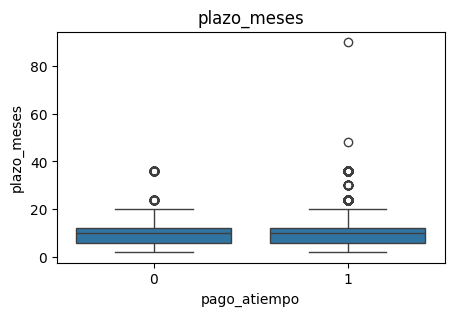

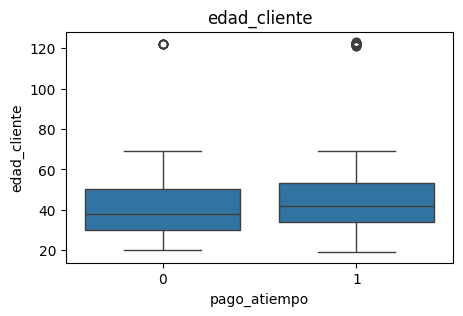

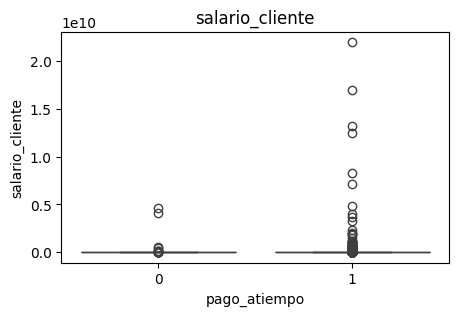

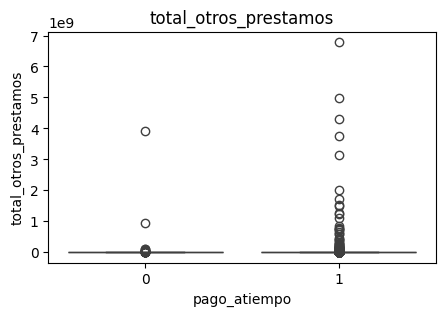

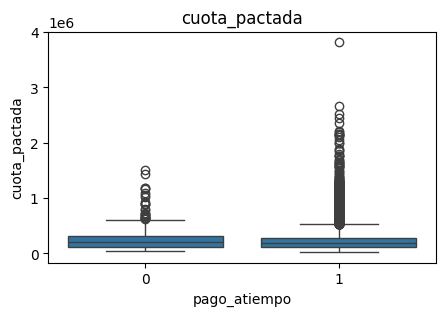

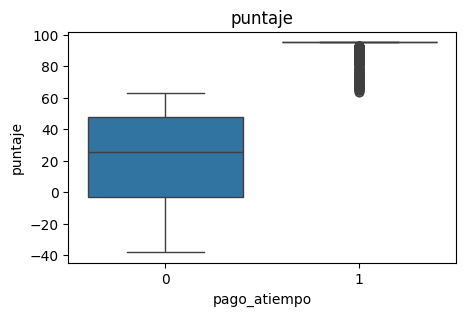

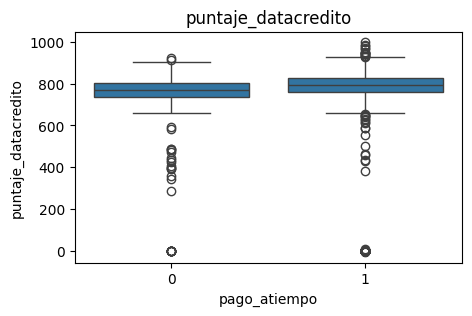

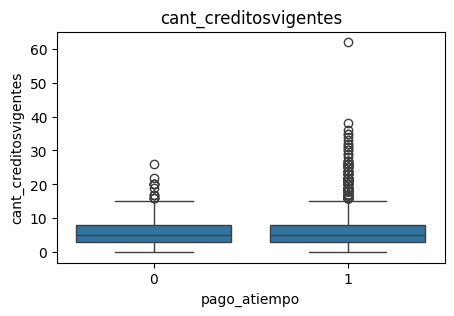

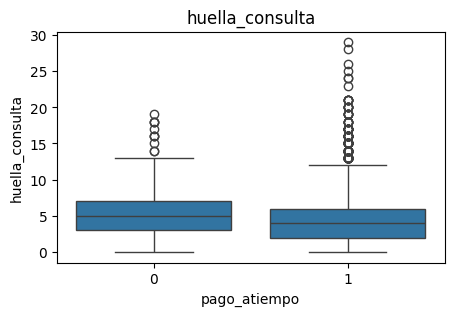

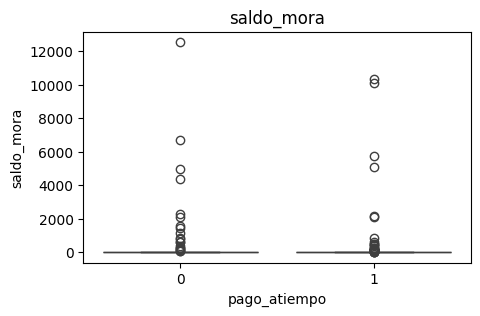

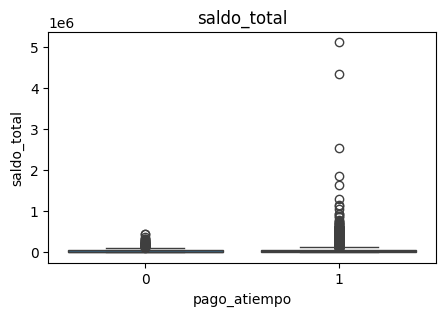

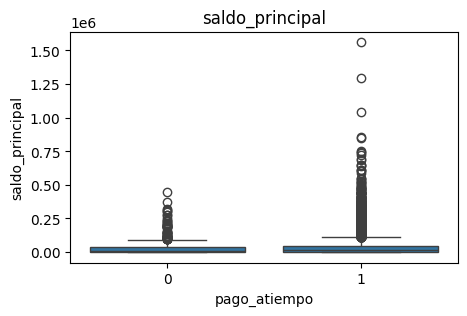

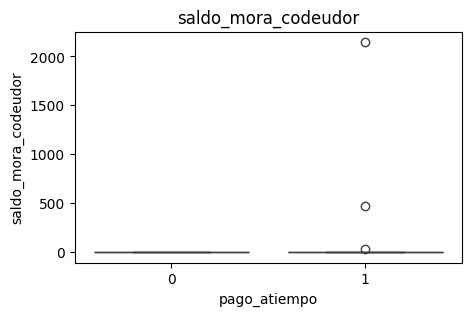

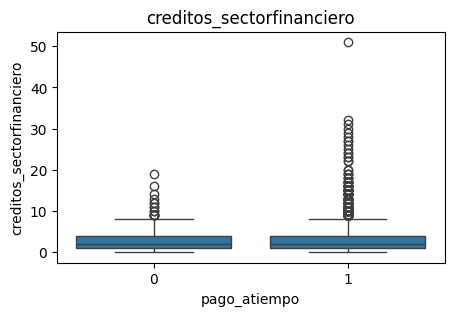

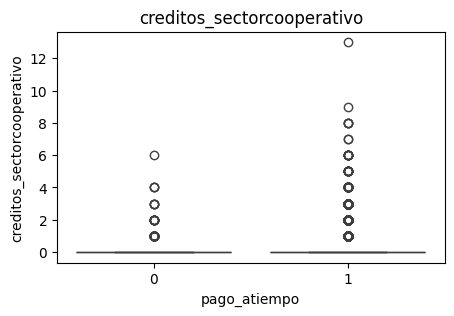

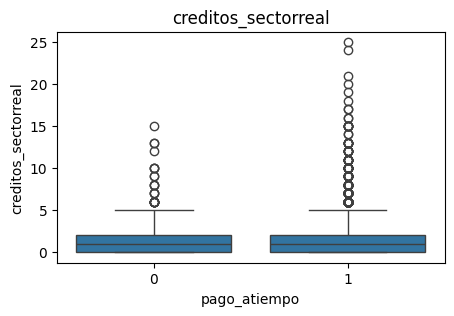

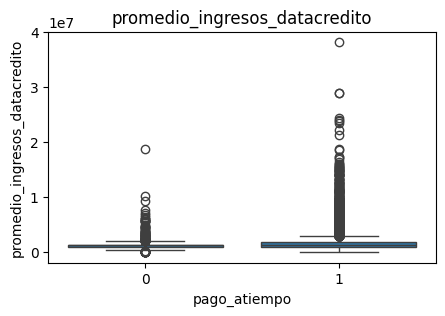

In [27]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x="pago_atiempo", y=col, data=df)
    plt.title(col)
    plt.show()

Comparar medianas entre clases.

### 9.2 Categóricas vs pago_atiempo

In [28]:
for col in cat_cols:
    tabla = pd.crosstab(df[col], df["pago_atiempo"], normalize="index")
    display(tabla)

pago_atiempo,0,1
tipo_credito,,
4,0.046869,0.953131
6,0.428571,0.571429
7,0.000000,1.000000
9,0.047006,0.952994
10,0.025862,0.974138
68,0.000000,1.000000


pago_atiempo,0,1
tipo_laboral,,
Empleado,0.042815,0.957185
Independiente,0.055153,0.944847


pago_atiempo,0,1
tendencia_ingresos,,
creciente,0.039108,0.960892
decreciente,0.062742,0.937258
desconocido,0.057055,0.942945
estable,0.046296,0.953704


Interpretar diferencias porcentuales.

## 10. Análisis Multivariado

### 10.1 Correlación

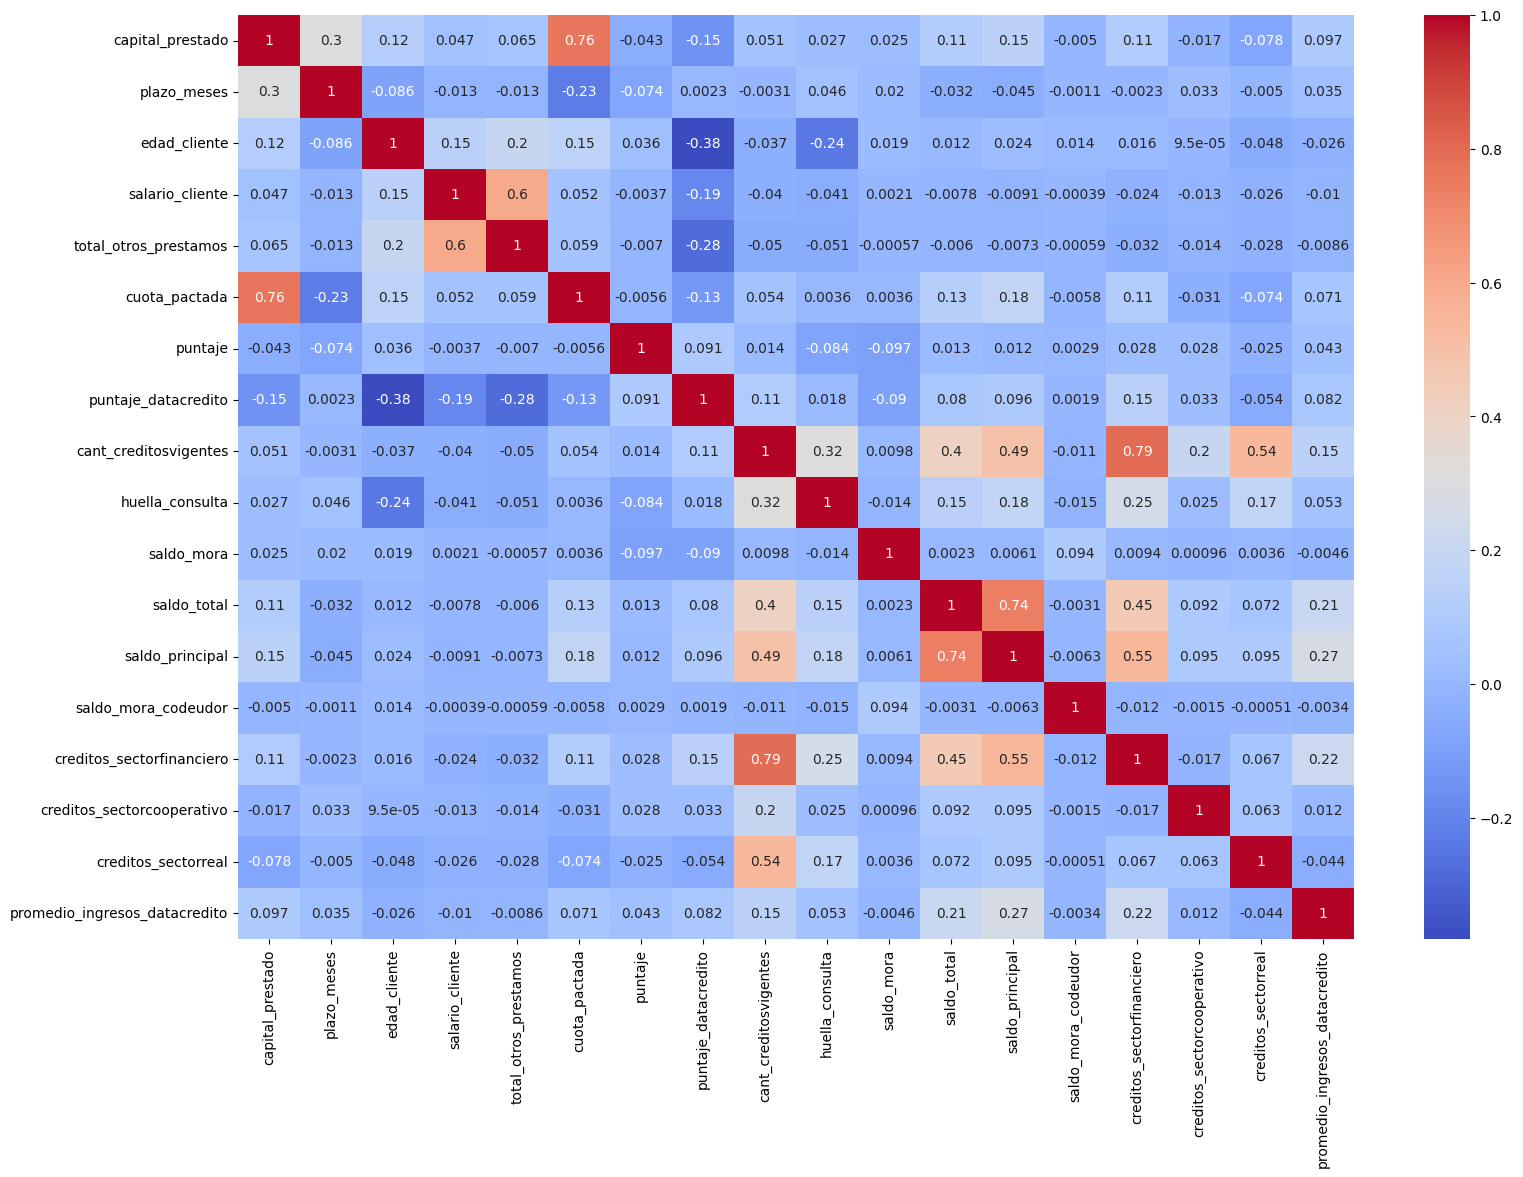

In [32]:
plt.figure(figsize=(18,12))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

Identificar:

- Multicolinealidad
- Variables redundantes

### 10.2 Pairplot

Observar separabilidad entre clases.

## 🛠 11. Posibles Transformaciones

- Logaritmo en montos altamente sesgados.
- Binning de ingresos.
- Codificación One-Hot en categóricas.
- Escalado de numéricas.

## ➕ 12. Variables Derivadas Propuestas

- ratio_mora = saldo_mora / saldo_total
- indicador_deuda = saldo_total > 0
- ingresos_vs_deuda = promedio_ingresos_datacredito / saldo_total

## ✅ 13. Reglas de Validación de Datos

- Puntaje crédito > 0
- Ingresos >= 0
- Saldos >= 0
- Categorías dentro de catálogo
- Sin nulos en variables críticas

# 📌 Conclusión General

El dataset presenta estructura adecuada para modelado supervisado.
Se detectan variables con potencial poder predictivo.
Se sugieren transformaciones para mejorar estabilidad de modelos.